In [227]:
import pandas as pd
import numpy as np

from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt


In [379]:
clus13 = pd.read_csv("output/cluster_13_111023.csv", index_col=0)
clusagg = pd.read_csv("output/cluster_stepmix_aggregate_010524.csv", index_col=0)
clusmulti = pd.read_csv("output/cluster_13_stepmix_multi_112923.csv", index_col=0)
clus13_na = pd.read_csv("output/cluster_13_ambiguousNaN_111023.csv", index_col=0)
tsne_comps = pd.read_csv("output/tsne_components.csv", index_col=0)

In [229]:
clusagg['cluster'] = clusagg['cluster'].add(-1)

In [230]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [231]:
AMI(clus13.cluster, clusagg.cluster)

0.7017100817253679

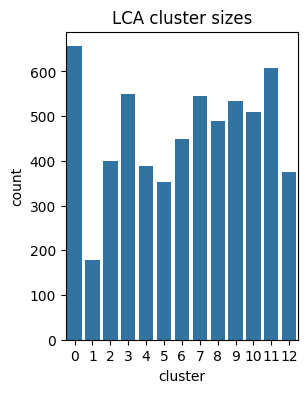

In [232]:
# plot value_counts
#clus13.plot.hist()
plt.figure(figsize=(3, 4))
sns.countplot(x=clus13['cluster'])
plt.title("LCA cluster sizes")
plt.savefig("figs/clustersize_13.pdf")

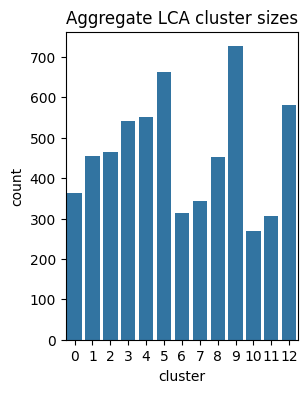

In [233]:
plt.figure(figsize=(3, 4))
sns.countplot(x=clusagg['cluster'])
plt.title("Aggregate LCA cluster sizes")
plt.savefig("figs/clustersize_agg.pdf")

In [234]:
clus13_na.cluster.isna().sum()

108

In [235]:
nas = clus13[clus13_na.cluster.isna()]

In [236]:
(nas.cluster.value_counts()/clus13.cluster.value_counts()).median()

0.016623687603610243

In [237]:
tsne_comps['consensus'] = clusagg['cluster']
tsne_comps['LCA'] = clus13['cluster']

<Axes: title={'center': 't-SNE Plot of consensus LCA'}, xlabel='tsne_1', ylabel='tsne_2'>

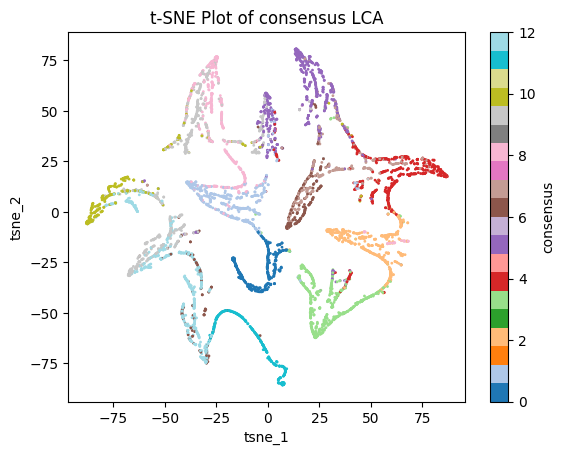

In [238]:
tsne_comps.plot.scatter(x='tsne_1', y='tsne_2', c='consensus', colormap='tab20', title= "t-SNE Plot of consensus LCA",
                    s=1)

<Axes: title={'center': 't-SNE plot of LCA clusters'}, xlabel='tsne_1', ylabel='tsne_2'>

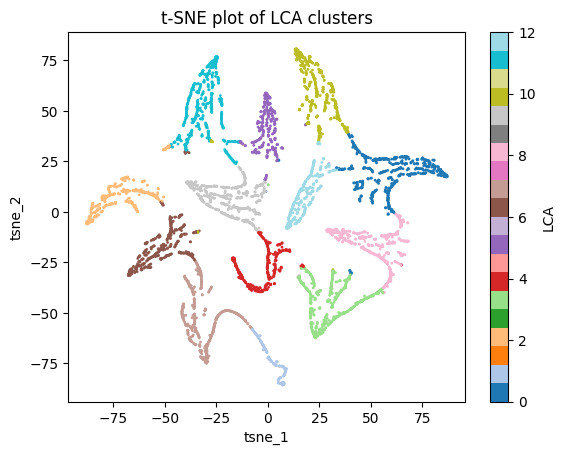

In [240]:
tsne_comps.plot.scatter(x='tsne_1', y='tsne_2', c='LCA', colormap='tab20', title= "t-SNE plot of LCA clusters",
                    s=1)

In [241]:
ensemble = pd.concat([clus13['cluster'].rename("clus13"), clusagg['cluster'].rename("clusagg")], axis=1)

In [242]:
overlaps_13_agg = ensemble.groupby("clusagg")['clus13'].value_counts().unstack(fill_value=0)
overlaps_13_agg = overlaps_13_agg.T

In [243]:
# clus13 -- clusagg
# 0 -- 5 and part of 8 
# 1 -- part of 12 
# 2 -- 10ish, all of 11, 1/4th of 13 
# 3 -- 4 
# 4 -- 1 
# 5 -- 6 and part of 10 
# 7 -- half of 13, half of 12, a third of 7
# 8 -- 3 
# 9 -- 2 and 1/4 of 9 
# 10 -- 6 and a piece of 8 but mostly 6 
# 11 -- 3/4 of 9, 40% of 10, a 10% of 11 
# 12 -- 7 and around a 3rd of 8

In [244]:
# row normalize
overlaps_13_agg = overlaps_13_agg.div(overlaps_13_agg.sum(axis=1), axis=0)


In [245]:
overlaps_13_agg.max(axis=1) 

clus13
0     0.757622
1     0.983146
2     0.571429
3     0.892532
4     0.922879
5     0.542614
6     0.601336
7     0.591912
8     0.902041
9     0.758427
10    0.805501
11    0.496711
12    0.505348
dtype: float64

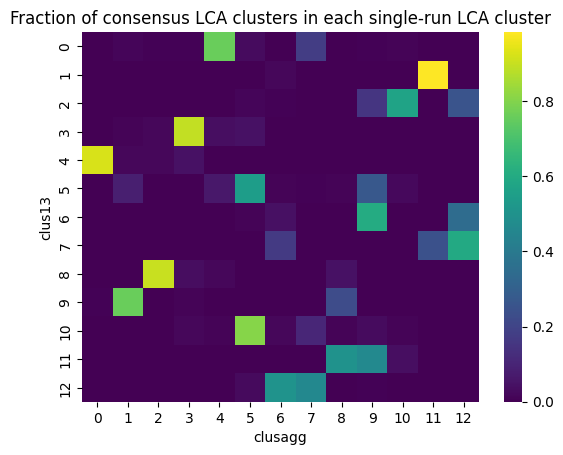

In [385]:
sns.heatmap(overlaps_13_agg, cmap="viridis")
#plt.ylabel("LCA clusters")
#plt.xlabel("Consensus LCA clusters")
plt.title("Fraction of consensus LCA clusters in each single-run LCA cluster")
plt.savefig("figs/overlaps_agg.pdf")

In [170]:
overlaps_13_agg.sum(axis=1)

clus13
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
dtype: float64

In [174]:
overlaps_13_agg*100

clusagg,1,2,3,4,5,6,7,8,9,10,11,12,13
clus13,,,,,,,,,,,,,
0,0.000000,1.219512,0.762195,0.609756,75.762195,2.743902,0.000000,17.378049,0.000000,0.609756,0.914634,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.685393,0.000000,0.000000,0.000000,0.000000,98.314607,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,1.253133,0.501253,0.250627,0.250627,15.037594,57.142857,0.000000,25.563910
3,0.000000,0.910747,1.821494,89.253188,3.460838,4.553734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,92.287918,1.799486,1.542416,4.370180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,8.238636,0.000000,0.000000,6.250000,54.261364,0.852273,0.568182,1.136364,26.704545,1.988636,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.890869,4.008909,0.222717,0.000000,60.133630,0.222717,0.000000,34.521158
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.544118,0.000000,0.000000,0.000000,0.000000,24.264706,59.191176
8,0.204082,0.204082,90.204082,3.265306,1.632653,0.000000,0.000000,0.000000,4.489796,0.000000,0.000000,0.000000,0.000000


In [175]:
overlaps_13_agg_flipped = ensemble.groupby("clusagg")['clus13'].value_counts().unstack(fill_value=0)
overlaps_13_agg_flipped = overlaps_13_agg_flipped.div(overlaps_13_agg_flipped.sum(axis=1), axis=0)


In [177]:
overlaps_13_agg_flipped*100

clus13,0,1,2,3,4,5,6,7,8,9,10,11,12
clusagg,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,98.626374,0.000000,0.000000,0.000000,0.274725,1.098901,0.000000,0.000000,0.000000
2,1.758242,0.000000,0.000000,1.098901,1.538462,6.373626,0.000000,0.000000,0.219780,89.010989,0.000000,0.000000,0.000000
3,1.077586,0.000000,0.000000,2.155172,1.293103,0.000000,0.000000,0.000000,95.258621,0.000000,0.000000,0.215517,0.000000
4,0.739372,0.000000,0.000000,90.573013,3.142329,0.000000,0.000000,0.000000,2.957486,1.109057,1.478743,0.000000,0.000000
5,90.036232,0.000000,0.000000,3.442029,0.000000,3.985507,0.000000,0.000000,1.449275,0.000000,0.905797,0.181159,0.000000
6,2.714932,0.000000,0.754148,3.770739,0.000000,28.808446,0.603318,0.000000,0.000000,0.000000,61.840121,0.000000,1.508296
7,0.000000,0.958466,0.638978,0.000000,0.000000,0.958466,5.750799,28.753994,0.000000,0.000000,2.555911,0.000000,60.383387
8,33.236152,0.000000,0.291545,0.000000,0.000000,0.583090,0.291545,0.000000,0.000000,0.000000,15.451895,0.000000,50.145773
9,0.000000,0.000000,0.221239,0.000000,0.000000,0.884956,0.000000,0.000000,4.867257,26.327434,0.884956,66.814159,0.000000


In [286]:
C0_in_agg4 = sympdf.loc[clusagg.index[clus13['cluster']==0][clusagg.index[clus13['cluster']==0].isin(clusagg.index[clusagg['cluster']==4])],:]

In [290]:
C0_in_agg4.mean(axis=0)


Symptom_Memory_short                  0.905433
Symptom_Memory_long                   0.293763
Symptom_Memory_no_new_memories        0.034205
Symptom_Memory_forget_tasks           0.062374
Symptom_Memory_other                  0.048290
                                        ...   
Symptom_SkinAllergy_shingles          0.016097
Symptom_PEM                           0.939638
Symptom_Fatigue                       0.995976
Symptom_Change_sensitivity_to_meds    0.152918
Symptom_New_allergies                 0.062374
Length: 162, dtype: float64

In [291]:
C0_not_agg4 = sympdf.loc[clusagg.index[clus13['cluster']==0][clusagg.index[clus13['cluster']==0].isin(clusagg.index[clusagg['cluster']!=4])],:]

In [294]:
diffs = C0_in_agg4.mean(axis=0)  - C0_not_agg4.mean(axis=0)


In [313]:
symps_of_interest = diffs.sort_values().head(6).index

In [314]:
C0_in_agg4.mean(axis=0)[symps_of_interest]

Symptom_Headaches_after_mental_exertion    0.219316
Symptom_Headaches_brain_pressure           0.229376
Symptom_Headaches_stiff_neck               0.388330
Symptom_Headaches_diffuse                  0.319920
Symptom_Eye_Vision_blurred_vision          0.183099
Symptom_Eye_Vision_sensitivity_to_light    0.191147
dtype: float64

In [315]:
C0_not_agg4.mean(axis=0)[symps_of_interest]

Symptom_Headaches_after_mental_exertion    0.465409
Symptom_Headaches_brain_pressure           0.452830
Symptom_Headaches_stiff_neck               0.610063
Symptom_Headaches_diffuse                  0.540881
Symptom_Eye_Vision_blurred_vision          0.402516
Symptom_Eye_Vision_sensitivity_to_light    0.396226
dtype: float64

In [317]:
C0_in_agg4['Symptom_Headaches_migraines'].mean()

0.22535211267605634

In [335]:
C0_not_agg4['Symptom_Headaches_migraines'].mean()
slp = ['Symptom_Difficulty_falling_asleep', 'Symptom_Waking_up_in_night', 'Symptom_Insomnia']

In [334]:
sympdf.loc[clus13.index[clus13['cluster']==9] ,slp].mean(axis=0)

Symptom_Difficulty_falling_asleep    0.000000
Symptom_Waking_up_in_night           0.000000
Symptom_Insomnia                     0.031835
dtype: float64

In [333]:
sympdf.loc[clus13.index[clus13['cluster']!=9] ,slp].mean(axis=0)

Symptom_Difficulty_falling_asleep    0.444970
Symptom_Waking_up_in_night           0.530289
Symptom_Insomnia                     0.757504
dtype: float64

In [340]:
mini = sympdf.loc[clus13.index[clus13['cluster']==4] ,:]

In [367]:
symps = {}
for pt in mini.index: 
    symps[pt] = mini.columns[mini.loc[pt,:] == 1].values

In [375]:
mini.loc[mini.sum(axis=1).idxmax(),:]

Symptom_Memory_short                  1.0
Symptom_Memory_long                   0.0
Symptom_Memory_no_new_memories        0.0
Symptom_Memory_forget_tasks           0.0
Symptom_Memory_other                  0.0
                                     ... 
Symptom_SkinAllergy_shingles          0.0
Symptom_PEM                           0.0
Symptom_Fatigue                       1.0
Symptom_Change_sensitivity_to_meds    0.0
Symptom_New_allergies                 0.0
Name: 12442, Length: 162, dtype: float64

In [378]:
symps[3850]

array(['Symptom_Memory_short', 'Symptom_Headaches_diffuse',
       'Symptom_Temp_lability', 'Symptom_Elevated_temp',
       'Symptom_Chills_flushing_sweats', 'Symptom_Acid_reflux',
       'Symptom_Dry_cough', 'Symptom_Cough_with_mucus',
       'Symptom_Coughing_up_blood', 'Symptom_Shortness_of_breath',
       'Symptom_Tightness_of_chest', 'Symptom_Pain_burning_chest',
       'Symptom_Difficulty_swallowing', 'Symptom_Changes_in_voice',
       'Symptom_Eye_Vision_dry_eyes', 'Symptom_Eye_Vision_bloodshot_eyes'],
      dtype=object)

In [382]:
ensemble = pd.concat([clus13['cluster'].rename("LCA"), clus_leo['cluster'].rename("Leo"), clus_chris['cluster'].rename("Chris")], axis=1)

In [384]:
# headmap for symptom groups for all three. 